# Distinguishing News From Fake News
**Due December 9**

---

**Chongyi Xu, 1531273**

**CSE 415 Fall 2017, Assignment 7**

In [49]:
#load any required packages here
%matplotlib inline
import time
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## 1. Importing Data

First, we want to import the fake news table from the source I found. The data I found is from https://github.com/GeorgeMcIntire/fake_real_news_dataset

According to the dataset documentation, text and metadata from fake news sites:

+ **Unnamed: 0:** unique id
+ **title:** title of an article
+ **text:** content of an article
+ **label:** label telling if the news is fake or real

In [50]:
data = pd.read_csv("fake_or_real_news.csv")
fake_news = data.set_index("Unnamed: 0")
y = fake_news.label
fake_news = fake_news.drop("label", axis=1)
data.head(10)

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   
5        6903                                        Tehran, USA   
6        7341  Girl Horrified At What She Watches Boyfriend D...   
7          95                  ‘Britain’s Schindler’ Dies at 106   
8        4869  Fact check: Trump and Clinton at the 'commande...   
9        2909  Iran reportedly makes new push for uranium con...   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  
5    \nI’m not an immigrant, but my grandparents ...  FAKE  
6  Share This Baylee Luciani (left), Screenshot o...  FAKE  
7  A Czech stockbroker who saved more than 650 Je...  REAL  
8  Hillary Clinton and Donald Trump made some ina...  REAL  
9  Iranian negotiators reportedly have made a las...  REAL

In [51]:
print(data.shape)

(6335, 4)


## 2. Seperating Training Data & Testing Data

Using random to seperate training data and testing data

In [52]:
x_train, x_test, y_train, y_test = train_test_split(fake_news['text'], y, test_size=0.33, random_state=53)

In [76]:
pd.DataFrame(x_test).head(10)

text
Unnamed: 0                                                   
4856        Donald Trump threatened to sue the New York Ti...
5323        Planned Parenthood: Abortion pill usage now ri...
4265        In a last dash, final "hail mary" attempt to e...
1697        Washington (CNN) Donald Trump and Ben Carson n...
3809        The Obama administration announced Friday it w...
8717          Three local military veterans to receive rec...
10396       Home This Month Popular What The Trump Skeptic...
269         But then the sobering realization sets in: the...
1387        Killing Obama administration rules, dismantlin...
2139        The party looks to Kamala Harris, Catherine Co...

## 3. Vectorizing Data

+ **TfidfVectorizer()**

In [53]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = vectorizer_tfidf.fit_transform(x_train)
tfidf_test = vectorizer_tfidf.transform(x_test)

+ **CountVectorizer()**

In [54]:
vectorizer_count = CountVectorizer(stop_words='english')
count_train = vectorizer_count.fit_transform(x_train)
count_test = vectorizer_count.transform(x_test)

In [55]:
# Get the feature names of `tfidf_vectorizer` 
print(vectorizer_tfidf.get_feature_names()[-10:])

# Get the feature names of `count_vectorizer` 
print(vectorizer_count.get_feature_names()[:10])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']
['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


## 4. Building Confusion Matrix Plot

In [56]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

## 5. Building Classifier Models

+ **Multinomial Naive Bayes**

In [57]:
from sklearn.naive_bayes import MultinomialNB

f1_score: 0.89314


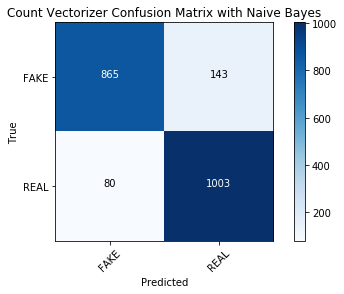

In [85]:
clf = MultinomialNB() 
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
f1_nb_count = f1_score(y_test, pred, average='weighted')
print("f1_score: %0.5f" % f1_nb_count)
cm_nb_count = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm_nb_count, classes=['FAKE', 'REAL'], title='Count Vectorizer Confusion Matrix with Naive Bayes')

f1_score: 0.85403


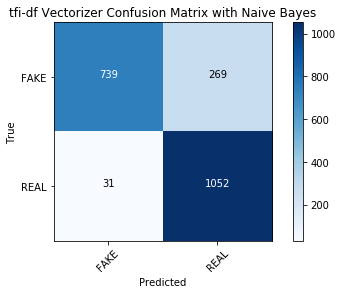

In [86]:
clf = MultinomialNB() 
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
f1_nb_tfidf = f1_score(y_test, pred, average='weighted')
print("f1_score: %0.5f" % f1_nb_tfidf)
cm_nb_tfidf = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm_nb_tfidf, classes=['FAKE', 'REAL'], title='tfi-df Vectorizer Confusion Matrix with Naive Bayes')

+ **Support Vector Machine**

In [60]:
from sklearn.svm import SVC

f1_score: 0.90722


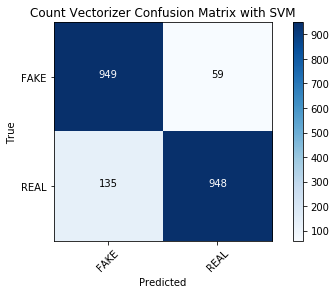

In [87]:
clf = SVC(kernel="linear", C=0.025)
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
f1_svm_count = f1_score(y_test, pred, average='weighted')
print("f1_score: %0.5f" % f1_svm_count)
cm_svm_count = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm_svm_count, classes=['FAKE', 'REAL'], title='Count Vectorizer Confusion Matrix with SVM')

f1_score: 0.70916


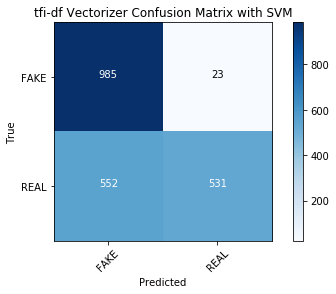

In [83]:
clf = SVC(kernel="linear", C=0.025)
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
f1_svm_tfidf = f1_score(y_test, pred, average='weighted')
print("f1_score: %0.5f" % f1_svm_tfidf)
cm_svm_tfidf = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm_svm_tfidf, classes=['FAKE', 'REAL'], title='tfi-df Vectorizer Confusion Matrix with SVM')

+ **Classification Tree**

In [63]:
from sklearn.tree import  DecisionTreeClassifier

f1_score: 0.77441


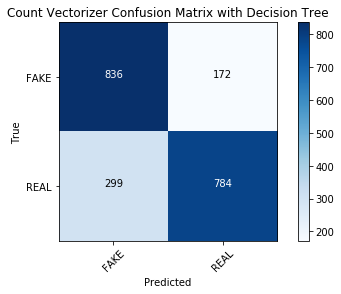

In [82]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
f1_tree_count = f1_score(y_test, pred, average='weighted')
print("f1_score: %0.5f" % f1_tree_count)
cm_tree_count = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm_tree_count, classes=['FAKE', 'REAL'], title='Count Vectorizer Confusion Matrix with Decision Tree')

f1_score: 0.78912


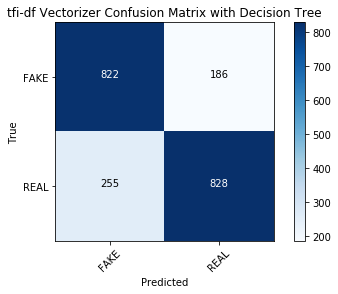

In [81]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
f1_tree_tfidf = f1_score(y_test, pred, average='weighted')
print("f1_score: %0.5f" % f1_tree_tfidf)
cm_tree_tfidf = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm_tree_tfidf, classes=['FAKE', 'REAL'], title='tfi-df Vectorizer Confusion Matrix with Decision Tree')

+ **KNeighbors Classifier**

In [66]:
from sklearn.neighbors import KNeighborsClassifier

f1_score: 0.80385


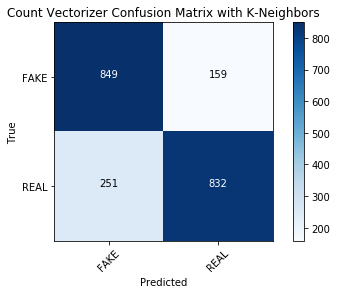

In [80]:
clf =  KNeighborsClassifier(3)
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
f1_knn_count = f1_score(y_test, pred, average='weighted')
print("f1_score: %0.5f" % f1_knn_count)
cm_knn_count = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm_knn_count, classes=['FAKE', 'REAL'], title='Count Vectorizer Confusion Matrix with K-Neighbors')

f1_score: 0.48072


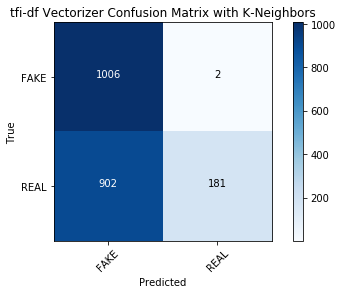

In [79]:
clf =  KNeighborsClassifier(3)
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
f1_knn_tfidf = f1_score(y_test, pred, average='weighted')
print("f1_score: %0.5f" % f1_knn_tfidf)
cm_knn_tfidf = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm_knn_tfidf , classes=['FAKE', 'REAL'], title='tfi-df Vectorizer Confusion Matrix with K-Neighbors')

## 6. Comparing Methods

|f1_score table| Count Vecotizer| tfi-df Vectorizer|
| ------------- |:-------------:| -----:|
| Naive Bayes |0.89314| 0.85403|
| Support Vector Machine|0.90722|0.70916|
|Classification Trees |0.77441|0.78912|
|KNeighbors|0.80385|0.48072|